Notebook for development and testing of grouped_linear_regression_acm_linear_restriction_stats

In [48]:
%load_ext autoreload
%autoreload 2

The autoreload extension is already loaded. To reload it, use:
  %reload_ext autoreload


In [49]:
import matplotlib.pyplot as plt
import numpy as np

from janelia_core.stats.regression import grouped_linear_regression_ols_estimator
from janelia_core.stats.regression import grouped_linear_regression_acm_linear_restriction_stats

## Parameters go here

In [102]:
coefs = np.asarray([2.0, 2.0, 0.0]) # List average actual values for each variable

coef_stds = np.asarray([.1, .1, .1]) # List standard deviation of noise associated with observation for each variable

corr_err_std = 2.0 # Standard deviation of error that is added to each subject's values 

n_smps_per_subj = [10, 15] # Range of the number of samples we can observe per subject

n_subjs = 100 # Number of subjects we simulate data from 

n_sims = 1000 # Number of simulations we run to get distributions of p-values

# Linear resrictions we want to test for
r = np.asarray([[1, -1, 0], [1, 0, 0]])
q = np.asarray([0, 2])

## Define some helper functions 

In [103]:
def gen_subj_data():
    
    n_coefs = len(coefs)
    n_smps = np.random.randint(n_smps_per_subj[0], n_smps_per_subj[1] + 1)
    
    y = np.zeros(n_smps)
    x = np.zeros([n_smps, n_coefs])
    
    for s_i in range(n_smps):
        coef_i = np.random.randint(0, n_coefs)
        y[s_i] = coef_stds[coef_i]*np.random.randn() + coefs[coef_i]
        x[s_i, coef_i] = 1
        
    y = y + corr_err_std*np.random.randn()
        
    return y, x

def gen_data():
    y = list()
    x = list()
    g = list()
    for subj_i in range(n_subjs):
        y_i, x_i = gen_subj_data()
        g_i = subj_i*np.ones_like(y_i)
        y.append(y_i)
        x.append(x_i)
        g.append(g_i)
        
    y = np.concatenate(y, axis=0)
    x = np.concatenate(x, axis=0)
    g = np.concatenate(g, axis=0)
    
    return y, x, g

## Do a whole bunch of simulations and get distribution of p-values for each coefficient

In [104]:
n_coefs = len(coefs)
p_vls = np.zeros(n_sims)
for sim_i in range(n_sims):
    y_i, x_i, g_i = gen_data()
    beta, acm, n_grps = grouped_linear_regression_ols_estimator(x=x_i, y=y_i, g=g_i)
    p_vls[sim_i] = grouped_linear_regression_acm_linear_restriction_stats(beta=beta, acm=acm, 
                                                                             r=r, q=q, n_grps=n_subjs)

## Now generate histograms of distributions of p-values

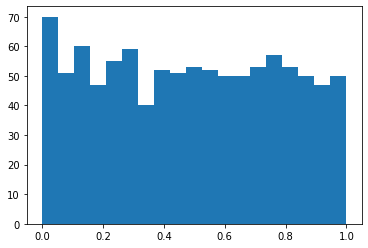

In [105]:
plt.figure()
_ = plt.hist(p_vls, bins=np.linspace(0, 1, 20))